# Course Name: Visualisation for Data Analytics
# Objective: Clustering

# In this lab, we will work on clustering the data using K-Means Algorithm.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans


## Q1: Read data in the csv file '3.12. Example.csv' 

In [ ]:
# Load the data
data = pd.read_csv ('3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Q2. Lets do some preliminary analysis before applying any clustering methods. Make a scatter plot of satisfaction vs Loyalty and write your interpretataion? 

Text(0, 0.5, 'Loyalty')

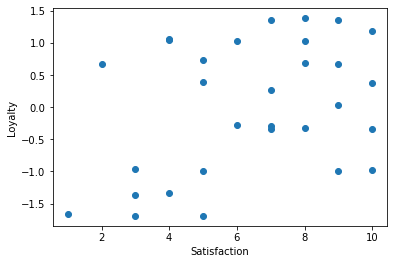

In [ ]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Q3. Apply K-means clsutering and show the clustering results? Use number of cluster =2

In [ ]:
# Select both features by creating a copy of the data variable

x = data.copy()

#Clustering

kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [ ]:
#Clustering results

# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)
clusters.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


Text(0, 0.5, 'Loyalty')

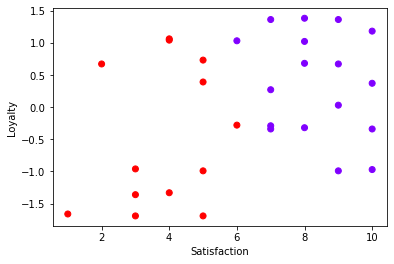

In [ ]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Q4. Apply some pre-processing steps on the data to see if the clustering results are imporved or changed. You can  'Standardize' the dataset along x-axis and see the results. Link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

## Q5. Apply K-means on standardize data? 

In [ ]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Q6. Apply 'Elbow'  to find the best number of clusters in K-means algorithms? Plot the results of 'Elbow' algorithm?

In [ ]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.660166530521062,
 5.536204767735098,
 4.449548936732537,
 3.825482330657991]

Text(0, 0.5, 'WCSS')

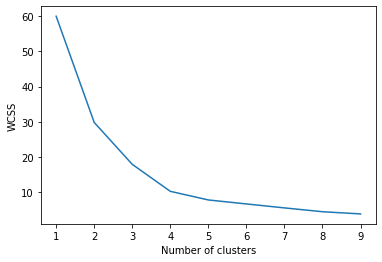

In [ ]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
 
print(clusters_new['cluster_pred'].unique())
clusters_new.head() 

[1 0 2 3]


,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2


## Q7. Apply K-means again for the best number of clusters obtained and plot the clusters? 

Text(0, 0.5, 'Loyalty')

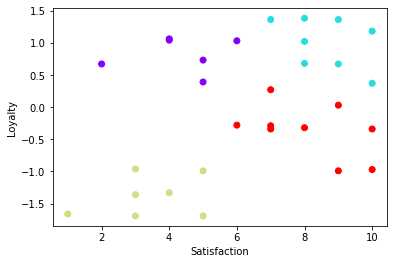

In [ ]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Q8. Reading: Visit this link and try to understand why K-means sometimes does not give intutive clusters?
Link: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-download-auto-examples-cluster-plot-kmeans-assumptions-py

# References:
https://github.com/timurista/data-analysis/tree/master/python-jupyter/Cluster%20Analysis
https://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/
https://harvard-iacs.github.io/2019-CS109B/labs/lab7/solutions/
https://harvard-iacs.github.io/2020-CS109B/labs/lab03/notebook/

1. Situation where k-means may not give the intutive clusters: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py